In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive'

**Import necessary libraries**

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Read data**

In [5]:
data = pd.read_csv(r'/content/drive/MyDrive/bank.csv', sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**Dealing with missing values**

In [7]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
data['y'].replace('no', 0 , inplace=True)
data['y'].replace('yes', 1, inplace=True)

**Visualize numerical data**

In [10]:
numerical_features = [col for col in data.columns if data[col].dtype != 'O']
numerical_features = data[numerical_features]
numerical_features.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
numerical_features.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [12]:
data.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

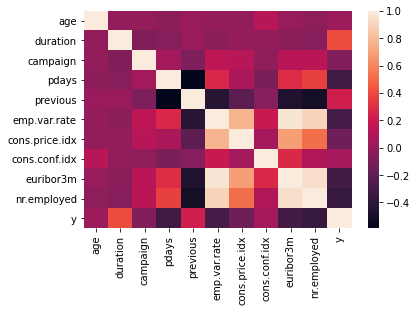

In [13]:
sns.heatmap(data.corr())

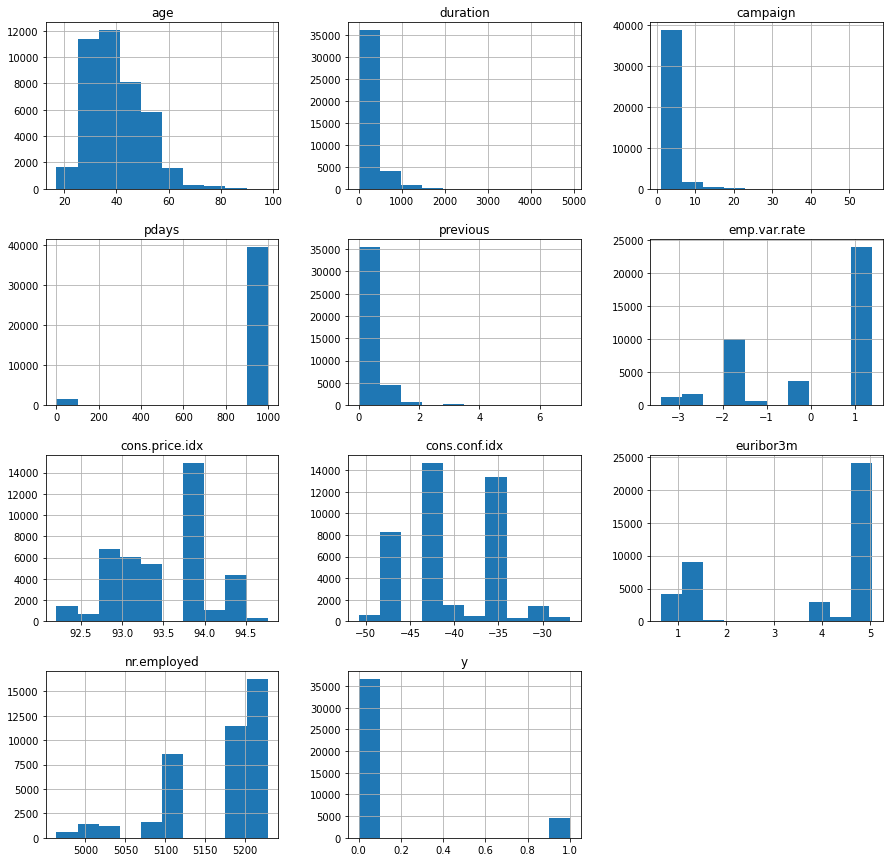

In [14]:
numerical_features.hist(figsize = (15,15))
plt.show()

**Visualize categorical data**

In [15]:
categorical_features = [col for col in data.columns if data[col].dtype == 'O']
categorical_features = data[categorical_features]
categorical_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [16]:
for col in categorical_features.columns:
  print(col)
  print(data[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']


In [17]:
data["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [18]:
data["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [19]:
data["education"].replace(["basic.9y", "basic.4y","basic.6y"], "primary", inplace = True)
data["education"].replace(["high.school"], "secondary", inplace = True)
data["education"].replace(["university.degree", "professional.course"], "tertiary", inplace = True)

In [20]:
data["education"].value_counts()

tertiary      17411
primary       12513
secondary      9515
unknown        1731
illiterate       18
Name: education, dtype: int64

**Dealing with unknown values**

In [21]:
#Replace unknown education and job with the education to job ratio 
edu_job_ratio = pd.DataFrame({'Job' : []})
for i in data["job"].unique():
  edu_job_ratio = edu_job_ratio.append(data[(data["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / data[(data["job"] == i)]["education"].value_counts().sum())
edu_job_ratio["Job"] = data["job"].unique()
edu_job_ratio.sort_index()

,Job,education
primary,housemaid,60.849057
primary,blue-collar,79.608818
primary,retired,47.500000
secondary,services,67.573696
secondary,student,40.800000
tertiary,admin.,58.683554
tertiary,technician,76.064066
tertiary,management,73.597811
tertiary,unemployed,39.842209
tertiary,self-employed,65.657987


In [22]:
data.loc[(data.job == "unknown") & (data.education == "primary"), "job"] = "blue-collar"
data.loc[(data.job == "unknown") & (data.education == "secondary"), "job"] = "services"
data.loc[(data.job == "unknown") & (data.education == "tertiary"), "job"] = "technician"
data.loc[(data.job == "unknown"), "job"] = "admin."

In [23]:
data.loc[(data.education == "unknown") & (data.job == "admin."),"education"] = "tertiary"
data.loc[(data.education == "unknown") & (data.job == "management"),"education"] = "tertiary"
data.loc[(data.education == "unknown") & (data.job == "services"),"education"] = "secondary"
data.loc[(data.education == "unknown") & (data.job == "technician."),"education"] = "tertiary"
data.loc[(data.education == "unknown") & (data.job == "retired"),"education"] = "primary"
data.loc[(data.education == "unknown") & (data.job == "blue-collar"),"education"] = "primary"
data.loc[(data.education == "unknown") & (data.job == "housemaid."),"education"] = "primary"
data.loc[(data.education == "unknown") & (data.job == "self-employed"),"education"] = "tertiary"
data.loc[(data.education == "unknown") & (data.job == "student"),"education"] = "secondary"
data.loc[(data.education == "unknown") & (data.job == "entrepreneur"),"education"] = "tertiary"
data.loc[(data.education == "unknown") & (data.job == "unemployed"),"education"] = "tertiary"
data.loc[(data.education == "unknown"),"education"] = "secondary"

In [24]:
data["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [25]:
#Drop default since there are large number of unknown values
data.drop(columns = ["default"], inplace = True)
categorical_features.drop(columns = ["default"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
data["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [27]:
data["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [28]:
count = 0
for i in range(0, 989):
  if (data[data["housing"] == "unknown"].index[0]) == (data[data["loan"] == "unknown"].index[0]):
    count += 1
print(count)

989


In [29]:
#Since same 990 records for both housing and loan values are unknown, drop them
data.drop(data[data["housing"] == "unknown"].index, inplace = True)

In [30]:
data.marital.value_counts()

married     24340
single      11288
divorced     4491
unknown        79
Name: marital, dtype: int64

In [31]:
data.loc[(data.marital == "unknown"),"marital"] = "married"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


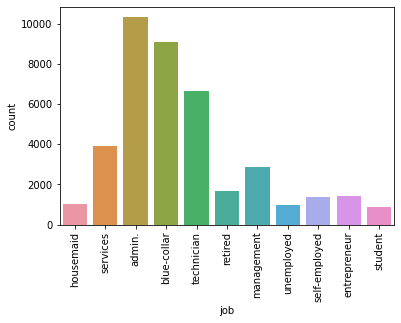

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


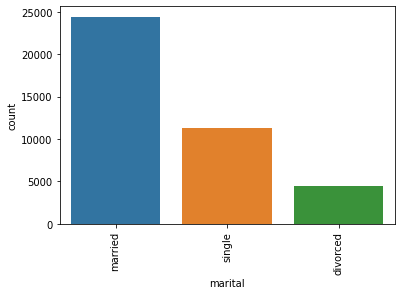

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


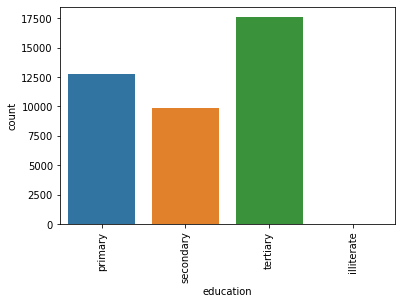

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


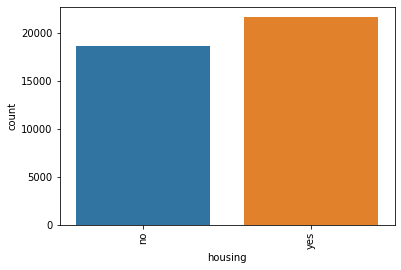

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


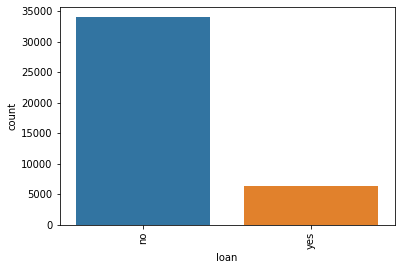

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


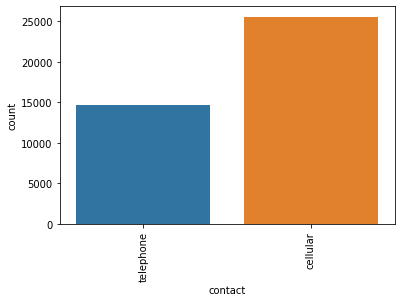

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


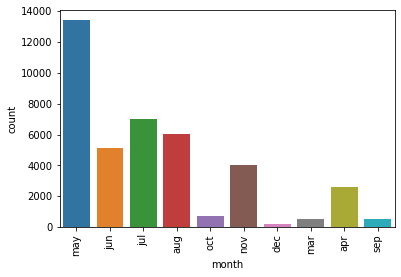

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


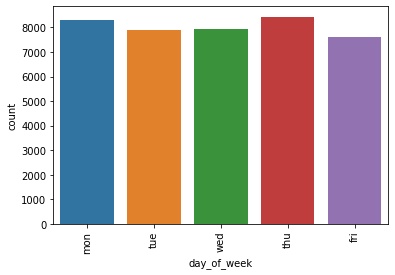

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


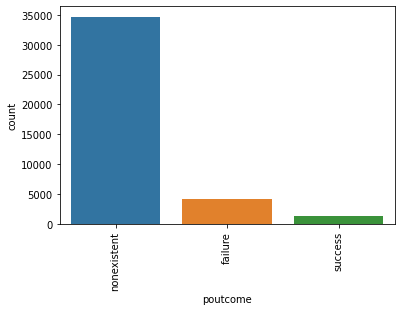

In [32]:
for col in categorical_features.columns:
  sns.countplot(data[col])
  plt.xticks(rotation=90)
  plt.show()

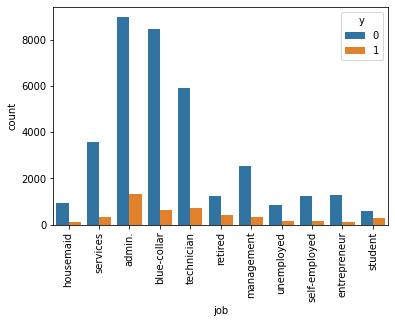

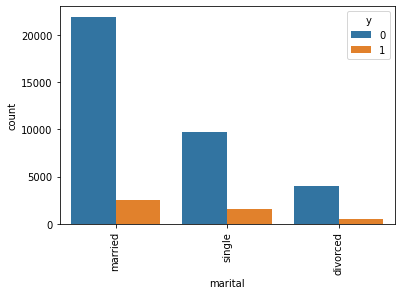

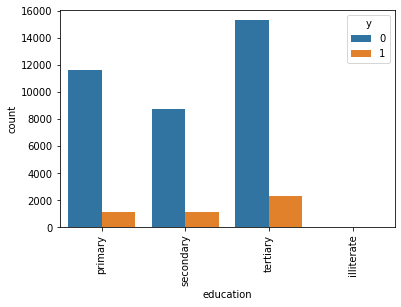

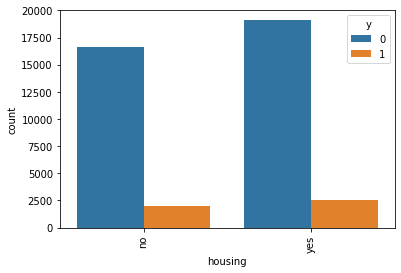

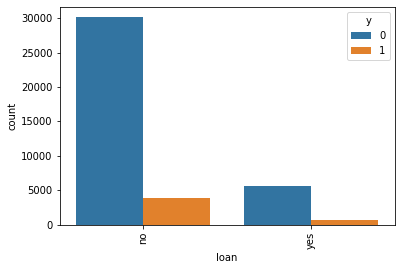

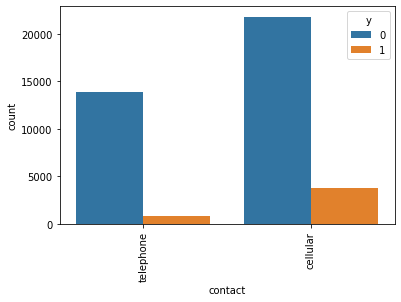

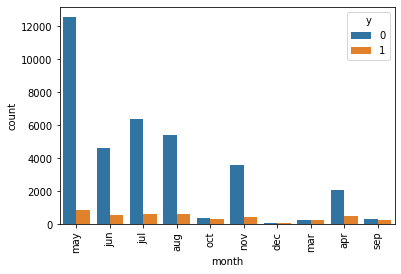

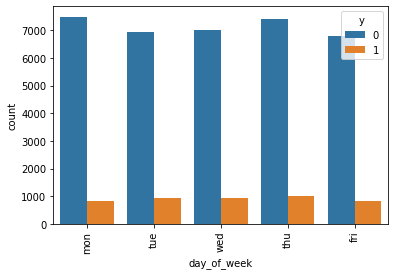

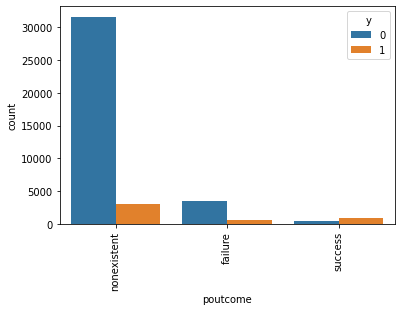

In [33]:
for col in categorical_features.columns:
  sns.countplot(x = data[col], hue = data.y)
  plt.xticks(rotation=90)
  plt.show()

In [34]:
data.drop(columns = ["day_of_week", "month"],inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


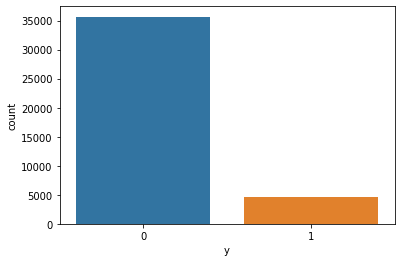

In [35]:
sns.countplot(data["y"])
plt.show()

**Categorical Encoding**

In [36]:
data.dropna(inplace = True)
ohe = OneHotEncoder(sparse = False)
job_cat = pd.DataFrame(ohe.fit_transform(data["job"].to_frame()), columns = "job_" + np.sort(data["job"].unique()))
data = pd.concat((data, job_cat), axis = 1)
data.drop(columns = ["job"],inplace = True)

In [37]:
data.dropna(inplace = True)
marital_cat = pd.DataFrame(ohe.fit_transform(data["marital"].to_frame()), columns = "marital_" + np.sort(data["marital"].unique()))
data = pd.concat((data, marital_cat), axis = 1)
data.drop(columns = ["marital"],inplace = True)

In [38]:
data.loc[(data.education == "illiterate"), "education"] = 3
data.loc[(data.education == "tertiary"), "education"] = 2
data.loc[(data.education == "secondary"), "education"] = 1
data.loc[(data.education == "primary"), "education"] = 0

In [39]:
data.loc[(data.housing == "no"), "housing"] = 1
data.loc[(data.housing == "yes"), "housing"] = 0

In [40]:
data.loc[(data.loan == "no"), "loan"] = 1
data.loc[(data.loan == "yes"), "loan"] = 0

In [41]:
data.loc[(data.contact == "telephone"),"contact"] = 1 
data.loc[(data.contact == "cellular") ,"contact"] = 0

In [42]:
data.dropna(inplace = True)
poutcome_cat = pd.DataFrame(ohe.fit_transform(data["poutcome"].to_frame()), columns = "poutcome_" + np.sort(data["poutcome"].unique()))
data = pd.concat((data, poutcome_cat), axis = 1)
data.drop(columns = ["poutcome"],inplace = True)

In [43]:
#Drop duration (unwanted according to feature description)
data.drop(columns = ["duration"], inplace = True)
numerical_features.drop(columns = ["duration"], inplace = True)

In [44]:
data.dropna(inplace = True)
data.education = data.education.astype(int)
data.housing = data.housing.astype(int)
data.loan = data.loan.astype(int)
data.contact = data.contact.astype(int)
data.y = data.y.astype(int)


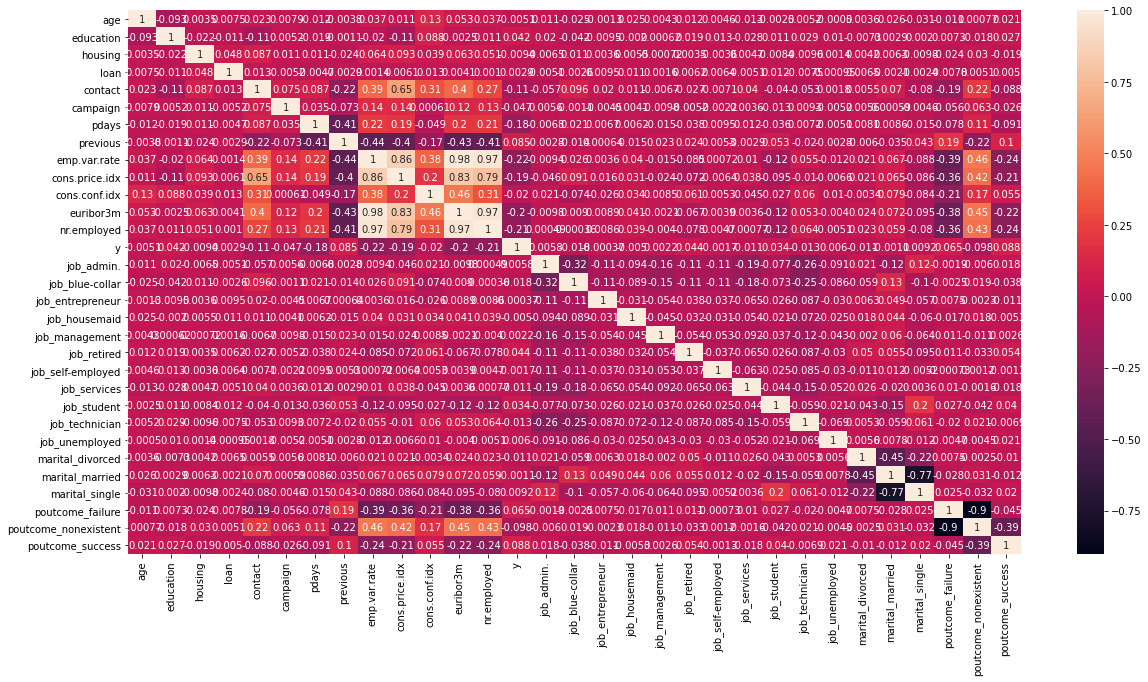

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True)

**Dealing with imbalanced data using SMOTE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


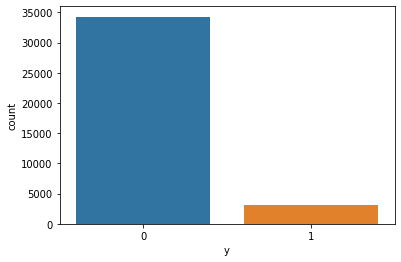

In [46]:
sns.countplot(data["y"])
plt.show()

In [47]:
x = data.drop(columns = ["y"])
y = data.y.to_frame()

In [48]:
sm = SMOTE()

In [49]:
x_sm , y_sm = sm.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
y_sm = pd.DataFrame(y_sm, columns = ["y"])
y_sm

,y
0,0
1,0
2,0
3,0
4,0
...,...
68541,1
68542,1
68543,1
68544,1


In [51]:
x_sm = pd.DataFrame(x_sm, columns =['age', 'education', 'housing', 'loan', 'contact', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'])

In [52]:
x_sm

,age,education,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56.000000,0.000000,1.000000,1.0,1.000000,1.000000,999.0,0.0,1.1,93.994,-36.4,4.857000,5191.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.00000,0.00000,0.000000,1.000000,0.0
1,57.000000,1.000000,1.000000,1.0,1.000000,1.000000,999.0,0.0,1.1,93.994,-36.4,4.857000,5191.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.00000,0.00000,0.000000,1.000000,0.0
2,37.000000,1.000000,0.000000,1.0,1.000000,1.000000,999.0,0.0,1.1,93.994,-36.4,4.857000,5191.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.00000,0.00000,0.000000,1.000000,0.0
3,40.000000,0.000000,1.000000,1.0,1.000000,1.000000,999.0,0.0,1.1,93.994,-36.4,4.857000,5191.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.00000,0.00000,0.000000,1.000000,0.0
4,56.000000,1.000000,1.000000,0.0,1.000000,1.000000,999.0,0.0,1.1,93.994,-36.4,4.857000,5191.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.00000,0.00000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68541,49.000000,0.000000,0.964978,1.0,0.000000,1.964978,999.0,0.0,1.4,93.444,-36.1,4.963140,5228.1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1.00000,0.00000,0.000000,1.000000,0.0
68542,31.000000,0.288244,1.000000,1.0,1.000000,3.288244,999.0,0.0,1.4,94.465,-41.8,4.960288,5228.1,0.000000,0.288244,0.0,0.711756,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.00000,0.00000,0.000000,1.000000,0.0
68543,37.898074,0.000000,0.000000,1.0,0.101926,4.898074,999.0,0.0,-1.8,92.893,-46.2,1.279471,5099.1,0.898074,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.101926,0.0,0.0,0.0,0.0,1.00000,0.00000,0.898074,0.101926,0.0
68544,26.442180,1.557820,0.000000,1.0,0.000000,1.000000,999.0,0.0,-1.8,92.843,-50.0,1.597381,5099.1,0.557820,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.442180,0.0,0.0,0.0,0.0,0.55782,0.44218,0.000000,1.000000,0.0


In [53]:
y_sm.value_counts()

y
1    34273
0    34273
dtype: int64

**Split data into train and test**

In [54]:
x_train , x_test , y_train , y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state = 50)

**Selecting important features using Random Forest**

In [55]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [56]:
sel.get_support()

array([ True,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False])

In [57]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

13

In [58]:
print(selected_feat)

Index(['age', 'education', 'housing', 'loan', 'campaign', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job_admin.',
       'job_blue-collar', 'job_technician', 'marital_married'],
      dtype='object')


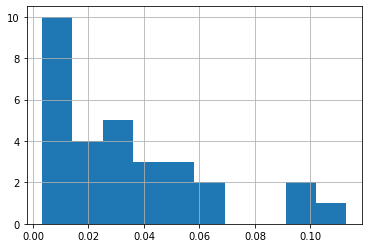

In [59]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [60]:
x_sm1 = pd.DataFrame()

In [61]:
for feat in selected_feat:
  x_sm1[feat] = x_sm[feat]

In [62]:
x_sm1

,age,education,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_technician,marital_married
0,56.000000,0.000000,1.000000,1.0,1.000000,1.1,93.994,-36.4,4.857000,0.000000,0.000000,0.0,1.00000
1,57.000000,1.000000,1.000000,1.0,1.000000,1.1,93.994,-36.4,4.857000,0.000000,0.000000,0.0,1.00000
2,37.000000,1.000000,0.000000,1.0,1.000000,1.1,93.994,-36.4,4.857000,0.000000,0.000000,0.0,1.00000
3,40.000000,0.000000,1.000000,1.0,1.000000,1.1,93.994,-36.4,4.857000,1.000000,0.000000,0.0,1.00000
4,56.000000,1.000000,1.000000,0.0,1.000000,1.1,93.994,-36.4,4.857000,0.000000,0.000000,0.0,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68541,49.000000,0.000000,0.964978,1.0,1.964978,1.4,93.444,-36.1,4.963140,0.000000,0.000000,1.0,1.00000
68542,31.000000,0.288244,1.000000,1.0,3.288244,1.4,94.465,-41.8,4.960288,0.000000,0.288244,0.0,1.00000
68543,37.898074,0.000000,0.000000,1.0,4.898074,-1.8,92.893,-46.2,1.279471,0.898074,0.000000,0.0,1.00000
68544,26.442180,1.557820,0.000000,1.0,1.000000,-1.8,92.843,-50.0,1.597381,0.557820,0.000000,0.0,0.55782


In [63]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x_sm1, y_sm, test_size = 0.3, random_state = 50)

***Logistic Regression***

In [64]:
lr = LogisticRegression()

In [65]:
lr.fit(x_train1, y_train1)
y_pred_lr = lr.predict(x_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
cm_lr = confusion_matrix(y_test1, y_pred_lr)
acc_lr = accuracy_score(y_test1, y_pred_lr)


In [67]:
f1_lr = f1_score(y_test1, y_pred_lr)

In [68]:
cm_lr , acc_lr, f1_lr

(array([[7002, 3417],
        [3643, 6502]]), 0.6566815794592492, 0.6481259968102074)

***KNN***

In [69]:
knn = KNeighborsClassifier()


In [70]:
knn.fit(x_train1, y_train1)
y_pred_knn = knn.predict(x_test1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [71]:
cm_knn = confusion_matrix(y_test1, y_pred_knn)
acc_knn = accuracy_score(y_test1, y_pred_knn)
f1_knn = f1_score(y_test1, y_pred_knn)


In [72]:
cm_knn , acc_knn, f1_knn

(array([[7218, 3201],
        [ 310, 9835]]), 0.8292647344874537, 0.8485397523834175)

***SVM***

In [73]:
svc = SVC()


In [74]:
svc.fit(x_train1, y_train1)
y_pred_svc = svc.predict(x_test1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
cm_svc = confusion_matrix(y_test1, y_pred_svc)
acc_svc = accuracy_score(y_test1, y_pred_svc)
f1_svc = f1_score(y_test1, y_pred_svc)


In [76]:
cm_svc , acc_svc, f1_svc

(array([[7774, 2645],
        [4279, 5866]]), 0.6632950787784477, 0.6288593481989707)

***AdaBoost***

In [77]:
abc = AdaBoostClassifier()

In [78]:
abc.fit(x_train1, y_train1)
y_pred_abc = abc.predict(x_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
cm_abc = confusion_matrix(y_test1, y_pred_svc)
acc_abc = accuracy_score(y_test1, y_pred_svc)
f1_abc = f1_score(y_test1, y_pred_abc)


In [82]:
cm_abc , acc_abc, f1_abc

(array([[7774, 2645],
        [4279, 5866]]), 0.6632950787784477, 0.8986143790849673)

**Performance Metrics**

In [84]:
tn = [cm_lr[0][0], cm_knn[0][0], cm_svc[0][0], cm_abc[0][0]]
fp = [cm_lr[0][1], cm_knn[0][1], cm_svc[0][1], cm_abc[0][1]]
fn = [cm_lr[1][0], cm_knn[1][0], cm_svc[1][0], cm_abc[1][0]]
tp = [cm_lr[1][1], cm_knn[1][1], cm_svc[1][1], cm_abc[1][1]]

acc = [acc_lr, acc_knn, acc_svc, acc_abc]
f1 = [f1_lr, f1_knn, f1_svc, f1_abc]
ind = ["LR", "KNN", "SVM", "AdaBoost"]

In [118]:
performance = pd.DataFrame(list(zip(tn, fp, fn, tp, np.multiply(acc,100), np.multiply(f1,100))), columns=["TN","FP","FN","TP","Accuracy", "f1-score"], index=ind)

In [119]:
performance

,TN,FP,FN,TP,Accuracy,f1-score
LR,7002,3417,3643,6502,65.668158,64.812600
KNN,7218,3201,310,9835,82.926473,84.853975
SVM,7774,2645,4279,5866,66.329508,62.885935
AdaBoost,7774,2645,4279,5866,66.329508,89.861438


We can say that KNN model is the best out of the four models, maximum f1-score = 84%